# Zipf's law

In [196]:
import nltk
import matplotlib as plt
import pandas as pd
from collections import Counter
import re

In [197]:
data = open('Text_3.txt', 'r').read().lower()
result = re.sub(r'[0-9\.]+', '', data)
tokenizer = nltk.RegexpTokenizer(r"\w+")
new_words = tokenizer.tokenize(result)

In [198]:
#resolving the situation with words' remains such as "s" in Zipf's, "n", "d" in n.d. etc.
cleaned = []
for i in new_words:
    if len(i)> 1 or i == "a":
        cleaned.append(i)

In [199]:
len(set(new_words)), len(set(cleaned))

(1982, 1962)

In [200]:
freq = Counter(cleaned)
df = pd.DataFrame.from_dict(freq, orient='index').reset_index()
df = df.rename(columns={'index':'word', 0:'freq'})
df.sort_values(by=['freq'], ascending=False, inplace=True)
df

,word,freq
1,the,580
4,of,438
8,a,301
12,in,263
54,to,252
...,...,...
1171,jordan,1
1172,steyvers,1
1173,griffiths,1
1175,dumais,1


In [201]:
df['rank'] = df['freq'].rank(ascending = False)
df

,word,freq,rank
1,the,580,1.0
4,of,438,2.0
8,a,301,3.0
12,in,263,4.0
54,to,252,5.0
...,...,...,...
1171,jordan,1,1490.0
1172,steyvers,1,1490.0
1173,griffiths,1,1490.0
1175,dumais,1,1490.0


<AxesSubplot:xlabel='rank', ylabel='freq'>

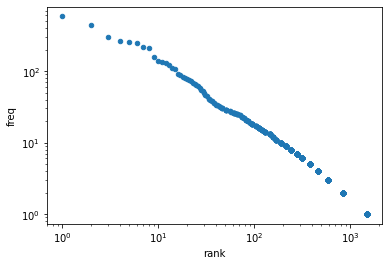

In [204]:
df.plot(x="rank", y="freq" , kind = 'scatter',loglog = True)
#if you rank according to the index, you will get horisontal lines instead of dots (similar to the plot in the lecture)

In [206]:
df['rankfreq'] = df['rank']*df['freq']
df

,word,freq,rank,rankfreq
1,the,580,1.0,580.0
4,of,438,2.0,876.0
8,a,301,3.0,903.0
12,in,263,4.0,1052.0
54,to,252,5.0,1260.0
...,...,...,...,...
1171,jordan,1,1490.0,1490.0
1172,steyvers,1,1490.0,1490.0
1173,griffiths,1,1490.0,1490.0
1175,dumais,1,1490.0,1490.0


<AxesSubplot:xlabel='rank', ylabel='rankfreq'>

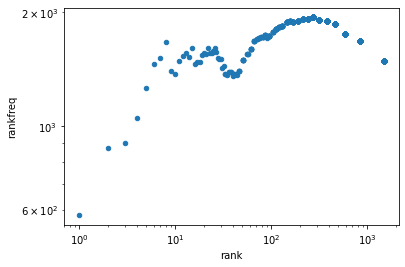

In [210]:
df.plot(x="rank", y="rankfreq", kind = 'scatter', loglog = True)

# Text similarity

In [117]:
text_0 = open('Text_0.txt', 'r').read().lower()
text_0 = re.sub(r'[0-9\.]+', '', text_0)
tokenizer = nltk.RegexpTokenizer(r"\w+")
new_text_0 = tokenizer.tokenize(text_0)
cleaned_0 = []
for i in new_text_0:
    if len(i)> 1 or i == "a":
        cleaned_0.append(i)

In [118]:
text_1 = open('Text_1.txt', 'r').read().lower()
text_1 = re.sub(r'[0-9\.]+', '', text_1)
new_text_1 = tokenizer.tokenize(text_1)
cleaned_1 = []
for i in new_text_1:
    if len(i)> 1 or i == "a":
        cleaned_1.append(i)


In [119]:
text_2 = open('Text_2.txt', 'r').read().lower()
text_2 = re.sub(r'[0-9\.]+', '', text_2)
new_text_2 = tokenizer.tokenize(text_2)
cleaned_2 = []
for i in new_text_2:
    if len(i)> 1 or i == "a":
        cleaned_2.append(i)


In [120]:
t0 = set(cleaned_0)
t1 = set(cleaned_1)
t2 = set(cleaned_2)

In [121]:
W = t0.union(t1,t2)

In [122]:
def tokdic(T):
    tokdic_Di = {}
    for elem in W:
        if elem in T:
            tokdic_Di[elem] = 1
        else:
            tokdic_Di[elem] = 0
    return tokdic_Di

In [90]:
t0_dic = tokdic(t0)
t1_dic = tokdic(t1)
t2_dic = tokdic(t2)

# Euclidean distance

In [123]:
def euclidean_distance(W1, W2):
    w1 = list(W1.values())
    w2 = list(W2.values())
    return sqrt(sum([(a-b)**2 for a,b in zip(w1,w2)]))

In [124]:
euclidean_distance(t0_dic, t1_dic), euclidean_distance(t0_dic, t2_dic), euclidean_distance(t1_dic, t2_dic), euclidean_distance(t0_dic, t0_dic)

(12.449899597988733, 15.0996688705415, 14.730919862656235, 0.0)

# Cosine similarity

In [125]:
def dot_prod(W1, W2):
    w1 = list(W1.values())
    w2 = list(W2.values())
    return sum([(a*b) for a,b in zip(w1,w2)])

In [126]:
from math import sqrt
def vector_length(W1):
    return sqrt(sum([v*v for k,v in W1.items()]))

In [127]:
def cosine(W1, W2):
    return (dot_prod(W1,W2)/(vector_length(W1)*vector_length(W2)))

In [128]:
cosine(t0_dic, t1_dic), cosine(t0_dic, t2_dic), cosine(t1_dic, t2_dic), cosine(t0_dic, t0_dic)

(0.21320071635561044, 0.23207912345911294, 0.2741985376901854, 1.0)

# Jaccard score

In [129]:
Int_01 = len(set(t0).intersection(t1))
Int_02 = len(set(t0).intersection(t2))
Int_12 = len(set(t1).intersection(t2))

In [98]:
Int_01, Int_02, Int_12

(21, 32, 38)

In [99]:
Uni_01 = len((t0.union(t1)))
Uni_02 = len((t0.union(t2)))
Uni_12 = len((t1.union(t2)))

In [100]:
Uni_01, Uni_02, Uni_12

(176, 260, 255)

In [101]:
from __future__ import division

In [102]:
J_01 = Int_01 / Uni_01
J_02 = Int_02 / Uni_02
J_12 = Int_12 / Uni_12


In [103]:
J_01, J_02, J_12

(0.11931818181818182, 0.12307692307692308, 0.14901960784313725)

In the given case, cosine similarity and Jaccard score yield correct results. 
The texts that are actually similar have different length and the texts of the same length are not similar. 
Euclidean distance propritises magnitude of the vectors and thus, sees the texts of the same length more similar. In our case, it gives wrong impression about actual similarity.